<a href="https://colab.research.google.com/github/jubayer8221/python-practice/blob/main/Lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

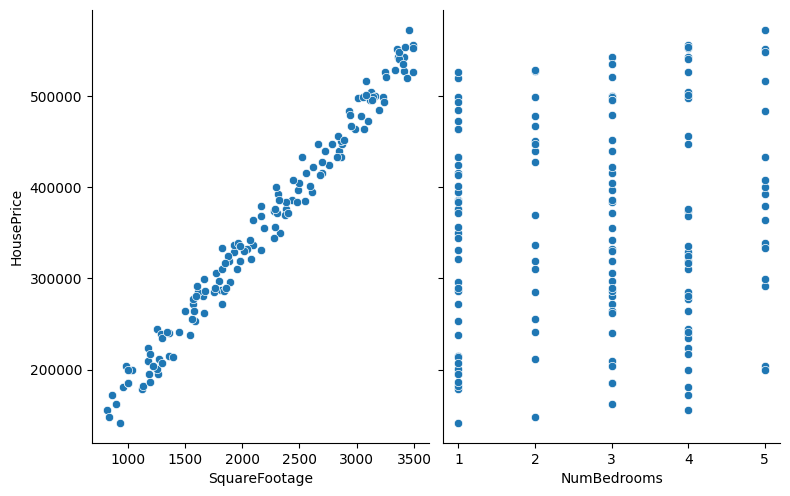

Mean Absolute Error (MAE): 4957.716718110209
R-squared: 0.9965648156922645
         Feature  Coefficient
0  SquareFootage   149.888636
1    NumBedrooms  9811.108669


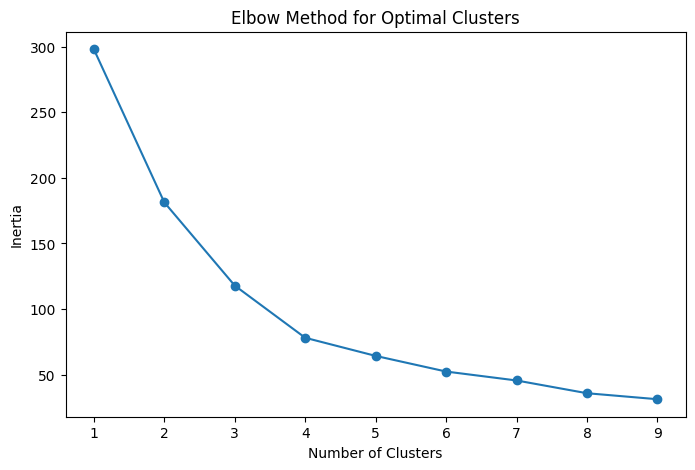

Silhouette Score: 0.3860117142903737



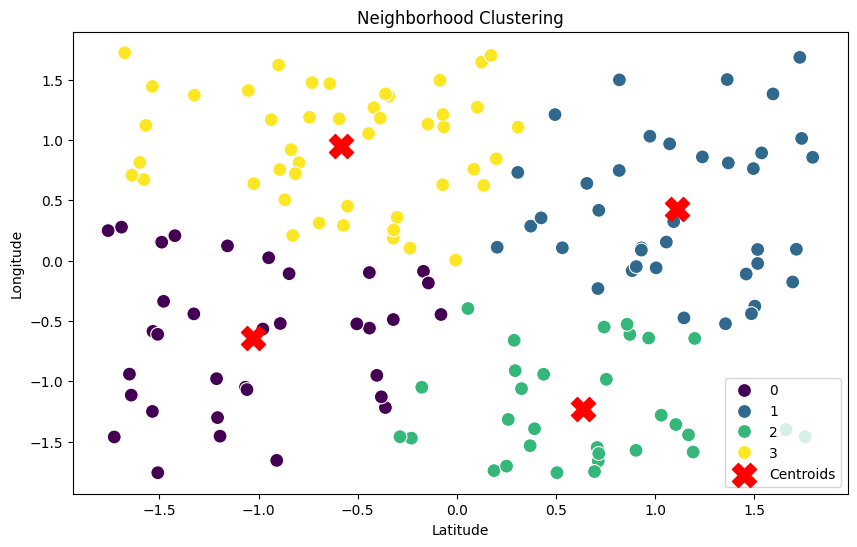

Cluster Summary:
   Cluster  avg_latitude  avg_longitude  count
0        0     -1.028948      -0.642572     34
1        1      1.108720       0.425920     38
2        2      0.635350      -1.225906     31
3        3     -0.583543       0.949252     46


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
data_url = '/content/real_estate_analysis.csv'
data = pd.read_csv(data_url)

# Data Preparation for Linear Regression
# Handle missing values
data = data.dropna()

# Handle outliers using the interquartile range (IQR) method
for column in ['SquareFootage', 'NumBedrooms', 'HousePrice']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Visualize relationships
sns.pairplot(data, x_vars=['SquareFootage', 'NumBedrooms'], y_vars='HousePrice', height=5, aspect=0.8)
plt.show()

# Model Building for Linear Regression ----
X = data[['SquareFootage', 'NumBedrooms']]
y = data['HousePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Insights
coefficients = pd.DataFrame({'Feature': ['SquareFootage', 'NumBedrooms'], 'Coefficient': lr_model.coef_})
print(coefficients)

# Data Preparation for K-Means Clustering
scaler = StandardScaler()
data[['Latitude', 'Longitude']] = scaler.fit_transform(data[['Latitude', 'Longitude']])

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Latitude', 'Longitude']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()
print('\n')

# Choose 4 clusters based on the elbow method
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Latitude', 'Longitude']])

# Calculate silhouette score
sil_score = silhouette_score(data[['Latitude', 'Longitude']], data['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Visualization of Clusters
print('\n')
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Latitude'], y=data['Longitude'], hue=data['Cluster'], palette='viridis', s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=300, c='red', label='Centroids', marker='X'
)
plt.title("Neighborhood Clustering")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

# Cluster Insights
cluster_summary = data.groupby('Cluster').agg(
    avg_latitude=('Latitude', 'mean'),
    avg_longitude=('Longitude', 'mean'),
    count=('Cluster', 'size')
).reset_index()
print("Cluster Summary:")
print(cluster_summary)